## Logistic Regression

Breast Cancer data from [the UCI repository](http://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29) contains records corresponding to 
cases of observed tumors.   There are a number of observations for each and a categorisation in the `class` column: 2 for benign (good), 4 for malignant (bad).  Your task is to build a logistic regression model to classify these cases. 

The data is provided as a CSV file.  There are a small number of cases where no value is available, these are indicated in the data with `?`. I have used the `na_values` keyword for `read_csv` to have these interpreted as `NaN` (Not a Number).  Your first task is to decide what to do with these rows. You could just drop these rows or you could [impute them from the other data](http://scikit-learn.org/stable/modules/preprocessing.html#imputation-of-missing-values).

You then need to follow the procedure outlined in the lecture for generating a train/test set, building and evaluating a model. Your goal is to build the best model possible over this data.   Your first step should be to build a logistic regression model using all of the features that are available.
  

In [196]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import r2_score
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import RFE

In [133]:
bcancer = pd.read_csv("files/breast-cancer-wisconsin.csv", na_values="?")
bcancer.head()

,sample_code_number,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2


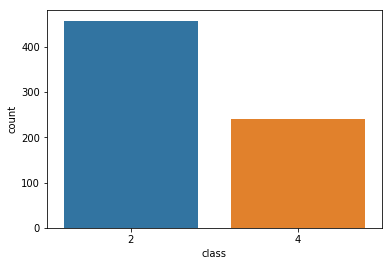

In [134]:
sns.countplot(bcancer['class'])

In [135]:
bcancer.isnull().sum()

sample_code_number              0
clump_thickness                 0
uniformity_cell_size            0
uniformity_cell_shape           0
marginal_adhesion               0
single_epithelial_cell_size     0
bare_nuclei                    16
bland_chromatin                 0
normal_nucleoli                 0
mitoses                         0
class                           0
dtype: int64

In [137]:
bcancer = bcancer.fillna(bcancer.mean())

In [138]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [139]:
X = bcancer[['bare_nuclei','normal_nucleoli', 'uniformity_cell_size', 'uniformity_cell_shape']]
y = bcancer['class']
model = LogisticRegression(C=1e9)
model.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [140]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train, y_train)
y_pred=logistic_regression.predict(X_test)

In [141]:
X = bcancer[['bare_nuclei','normal_nucleoli', 'uniformity_cell_size', 'uniformity_cell_shape']]
y = bcancer['class']
model = LogisticRegression(C=1e9)
model.fit(X, y)

LogisticRegression(C=1000000000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [142]:
predict_df = train[['sample_code_number', 'class']].copy()
predict_df['predict class'] = model.predict(X_train)
predict_df.head()

,sample_code_number,class,predict class
397,1196263,2,4
127,1177027,2,2
424,1257938,2,4
219,1223967,2,4
129,1177512,2,2


### Evaluation

To evaluate a classification model we want to look at how many cases were correctly classified and how many
were in error.  In this case we have two outcomes - benign and malignant.   SKlearn has some useful tools, the 
[accuracy_score]() function gives a score from 0-1 for the proportion correct.  The 
[confusion_matrix](http://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix) function 
shows how many were classified correctly and what errors were made.  Use these to summarise the performance of 
your model (these functions have already been imported above).

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


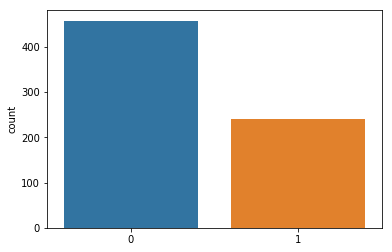

In [143]:
from sklearn.preprocessing import LabelEncoder

dataframe = pd.DataFrame(bcancer['class'])
LabelEncoder_y=LabelEncoder()
y=LabelEncoder_y.fit_transform(dataframe)

sns.countplot(y, Label='count')

### Checkpoint

The checkpoint for this week workshop is to report accuracy on training and test set. Also, provide the confusion matrix to check for which class model is doing good and where error were are made. Based on these results, provide explaination about:
- Can we deploy this trained model in hospital's settings?
- Is model overfitting?
- For which class model is making error? Read about False Positive Rate (FPR) and False Negative Rate (FNR)

**On iLearn under Practical Week 6, make your submission in the form of results and their interpretation (1 paragraph) to get mark for this week checkpoint.**

In [144]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))
plt.show()

Accuracy:  0.965714285714


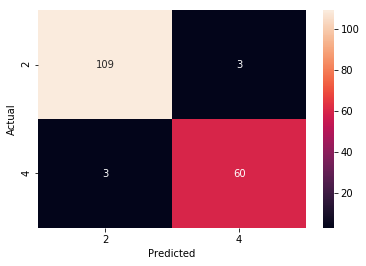

In [158]:
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, fmt='g')

In [186]:
def print_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    print('True positive = ', cm[0][0])
    print('False positive = ', cm[0][1])
    print('False negative = ', cm[1][0])
    print('True negative = ', cm[1][1])

In [197]:
print_confusion_matrix(y_test, y_pred)

True positive =  109
False positive =  3
False negative =  3
True negative =  60


In [198]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          2       0.97      0.97      0.97       112
          4       0.95      0.95      0.95        63

avg / total       0.97      0.97      0.97       175



### Feature Selection

Since you have many features available, one part of building the best model will be to select which features to use as input to the classifier. Your initial model used all of the features but it is possible that a better model can 
be built by leaving some of them out.   Test this by building a few models with subsets of the features - how do your models perform? 

This process can be automated.  The [sklearn RFE function](http://scikit-learn.org/stable/modules/feature_selection.html#recursive-feature-elimination) implements __Recursive Feature Estimation__ which removes 
features one by one, evaluating the model each time and selecting the best model for a target number of features.  Use RFE to select features for a model with 3, 4 and 5 features - can you build a model that is as good or better than your initial model?

In [159]:
selector = RFE(model, n_features_to_select=None)
selector = selector.fit(X_train, y_train)

support = selector.support_
ranking = selector.ranking_
feature = X_train.columns[selector.support_]

RFE_df = pd.DataFrame({'Columns': X_train.columns, 'Ranking': ranking, 'Support': support})
RFE_df

,Columns,Ranking,Support
0,bare_nuclei,1,True
1,normal_nucleoli,3,False
2,uniformity_cell_size,2,False
3,uniformity_cell_shape,1,True


## Conclusion

Write a brief conclusion to your experiment.  You might comment on the proportion of __false positive__ and __false negative__ classifications your model makes.  How useful would this model be in a clinical diagnostic setting? 